# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 19.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 require

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Make sure the versions of the modules are greater than or equal to the ones specified:
print(np.__version__)
print(pd.__version__)
# print(plt.__version__)
print(sns.__version__)

2.2.2
1.26.4
3.10.0
0.13.2


### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [246]:
# Write your code here to read the data
# import os
# print(os.listdir('/content/drive/MyDrive/Colab_Notebooks'))
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
# df.head(5)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 1898
Columns: 9


#### Observations:
Excluding the header line, there are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.dtypes

,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


#### Observations:
Following command could also be used instead:
\
df.info()

\
These are the data types for the columns:

order_id: int64

customer_id: int64

restaurant_name: object

cuisine_type: object

cost_of_the_order: float64

day_of_the_week: object

rating : object

food_preparation_time: int64

delivery_time: int64

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
# The following shows it separately for each column:
print(df.isna().sum())

# The following shows the total across all the columns:
print(df.isna().sum().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
0


#### Observations:
Used print around df as that way both the commands above will show their results.

\
Following commands will return the same result:

df.isnull().sum()

df.isnull().sum().sum()

\
There are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
result1 = df.describe()
# print(type(result1))
# print(df.describe().T)
result2 = result1['food_preparation_time']
# print(result1)
# print(result2)
print(f"Minimum: {result2['min']}")
print(f"Average: {result2['mean']}")
print(f"Maximum: {result2['max']}")


Minimum: 20.0
Average: 27.371970495258168
Maximum: 35.0


#### Observations:
Time for food to be prepared once the order is placed:

Minimum: 20 minutes

Average: 27.372 minutes

Maximum: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [86]:
# Write the code here
# df['rating'].unique()
df['rating'][df['rating'] == 'Not given'].value_counts().sum()

736

#### Observations:
There are 736 orders in total which are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]



Column name: order_id
Total unique values in the column: 1898
The column has too many unique values for a plot to make sense for univariate analysis ....


Column name: customer_id
Total unique values in the column: 1200
The column has too many unique values for a plot to make sense for univariate analysis ....


Column name: restaurant_name
Total unique values in the column: 178
The column has too many unique values for a plot to make sense for univariate analysis ....


Column name: cuisine_type
Total unique values in the column: 14


<function histplot at 0x7d7ec405c540>
Unique values in the column: 
['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']




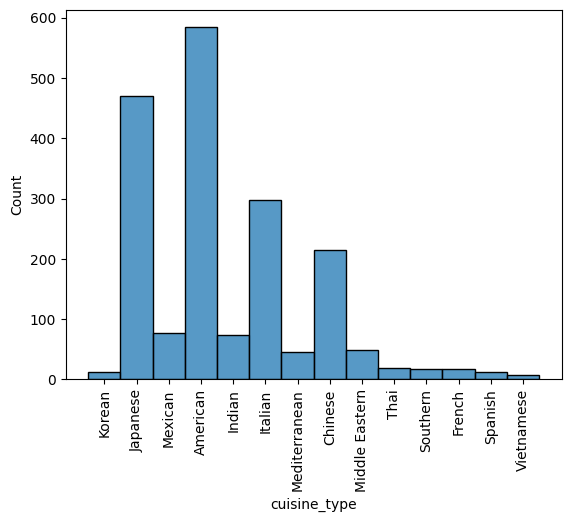



<function boxplot at 0x7d7ec3fb60c0>


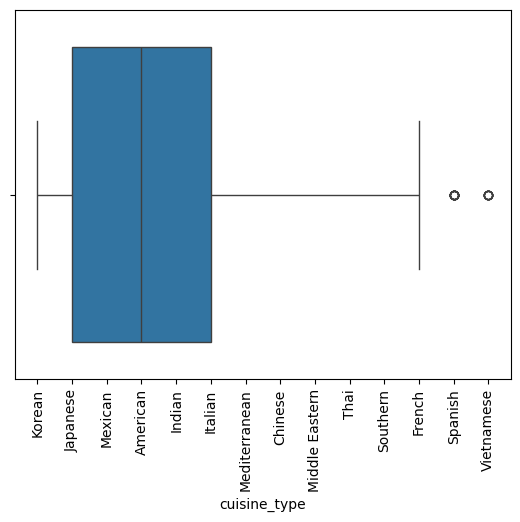



<function countplot at 0x7d7ec3fb6520>


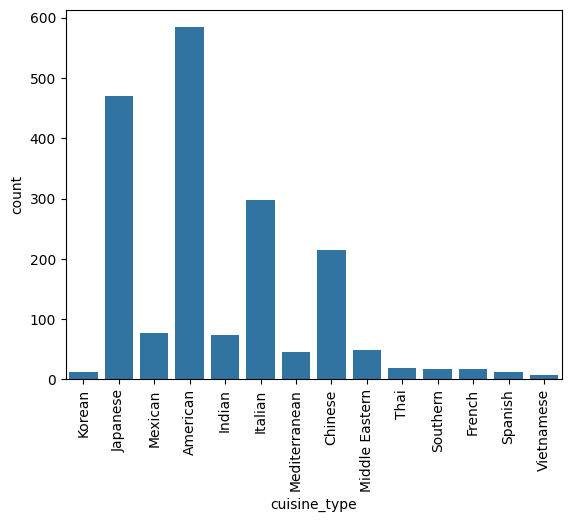



<function violinplot at 0x7d7ec3fb6160>


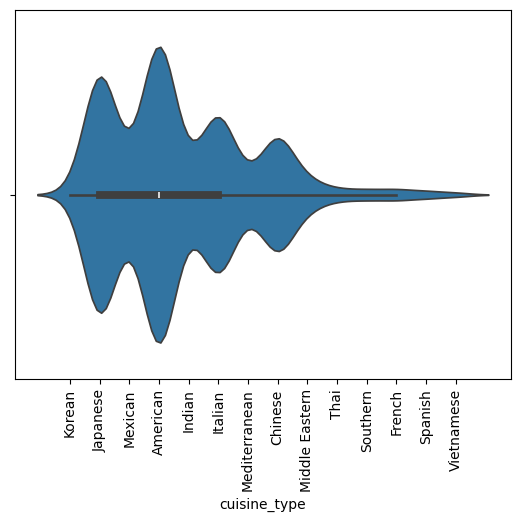





Column name: cost_of_the_order
Total unique values in the column: 312


<function histplot at 0x7d7ec405c540>


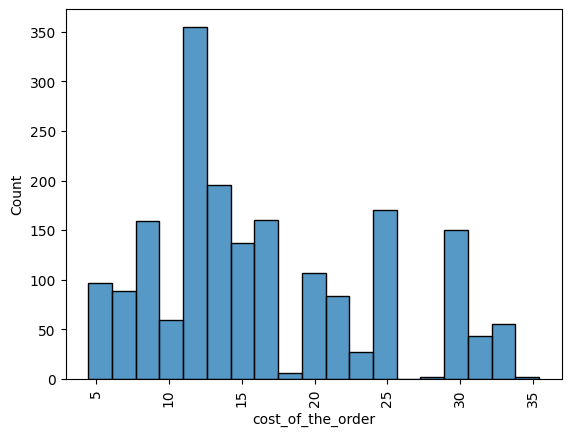



<function boxplot at 0x7d7ec3fb60c0>
<function countplot at 0x7d7ec3fb6520>
<function violinplot at 0x7d7ec3fb6160>


Column name: day_of_the_week
Total unique values in the column: 2


<function histplot at 0x7d7ec405c540>
Unique values in the column: 
['Weekend' 'Weekday']




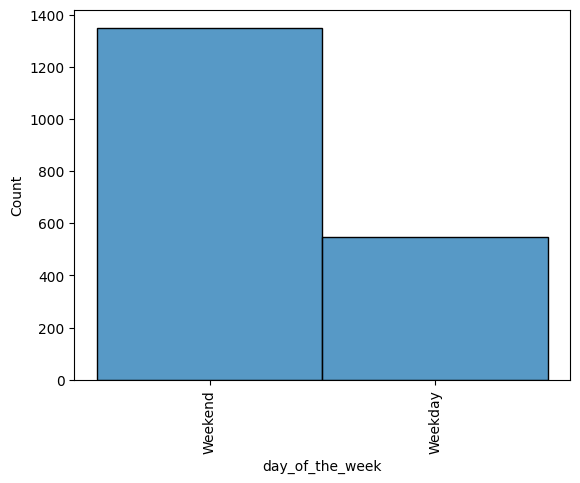



<function boxplot at 0x7d7ec3fb60c0>


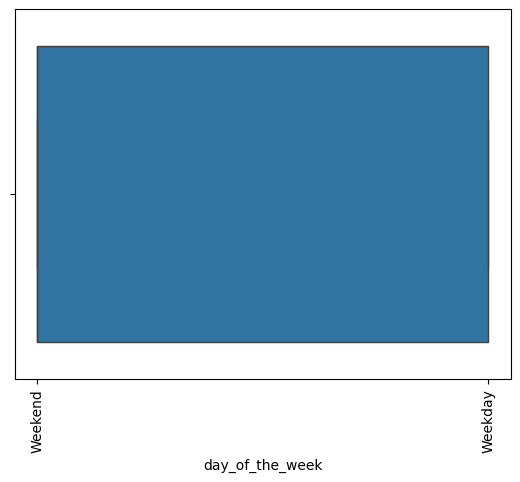



<function countplot at 0x7d7ec3fb6520>


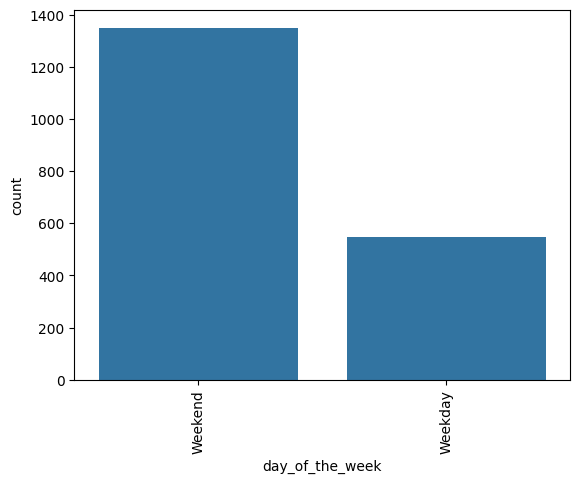



<function violinplot at 0x7d7ec3fb6160>


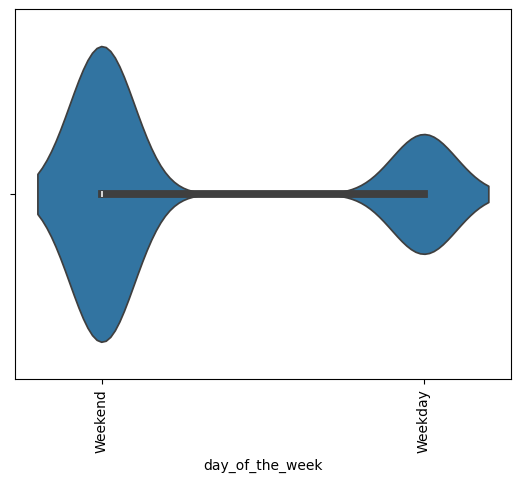





Column name: rating
Total unique values in the column: 4


<function histplot at 0x7d7ec405c540>
Unique values in the column: 
['Not given' '5' '3' '4']




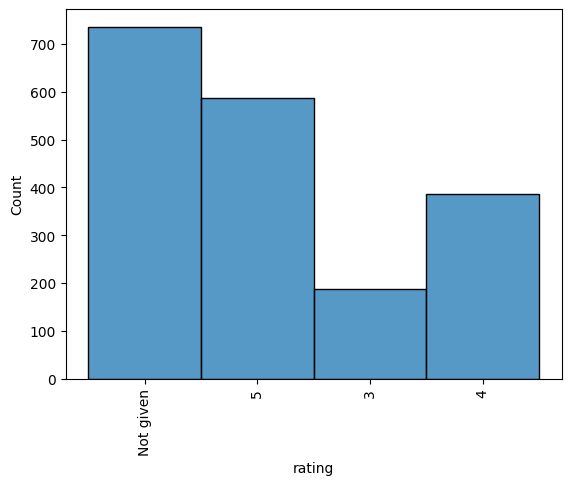



<function boxplot at 0x7d7ec3fb60c0>


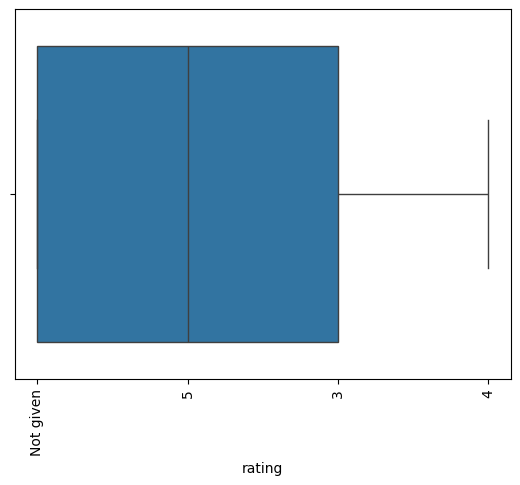



<function countplot at 0x7d7ec3fb6520>


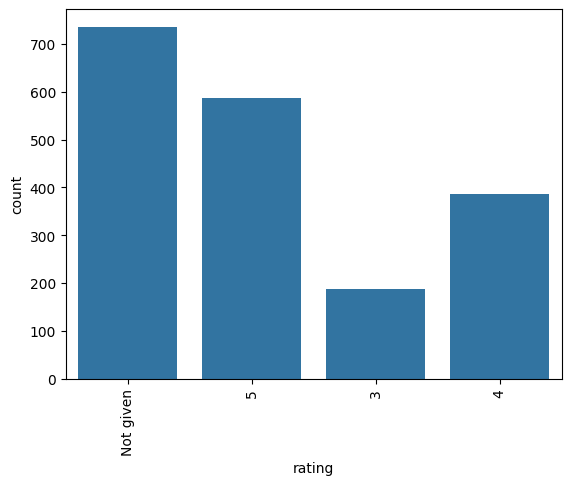



<function violinplot at 0x7d7ec3fb6160>


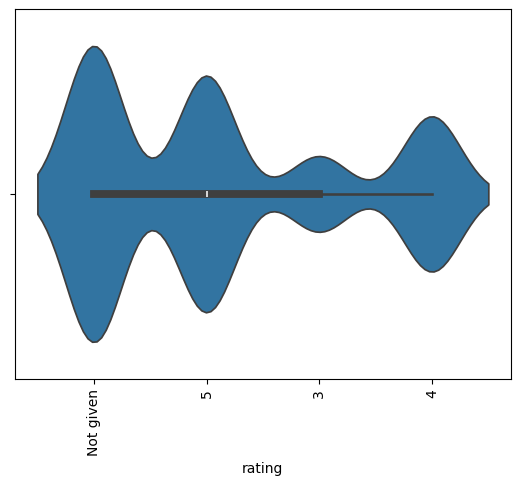





Column name: food_preparation_time
Total unique values in the column: 16


<function histplot at 0x7d7ec405c540>
Unique values in the column: 
[25 23 20 28 33 21 29 34 24 30 35 32 31 27 22 26]




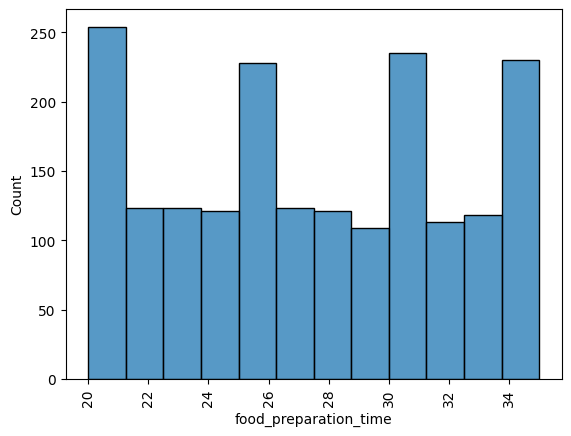



<function boxplot at 0x7d7ec3fb60c0>


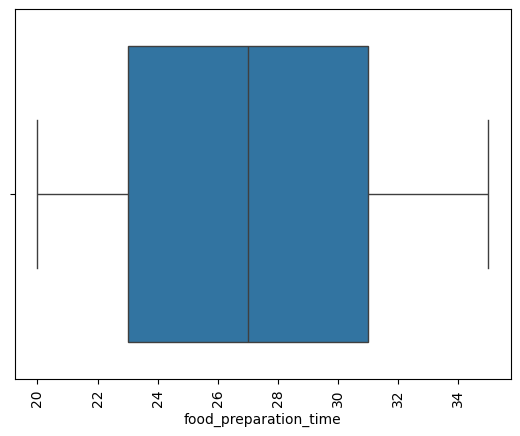



<function countplot at 0x7d7ec3fb6520>


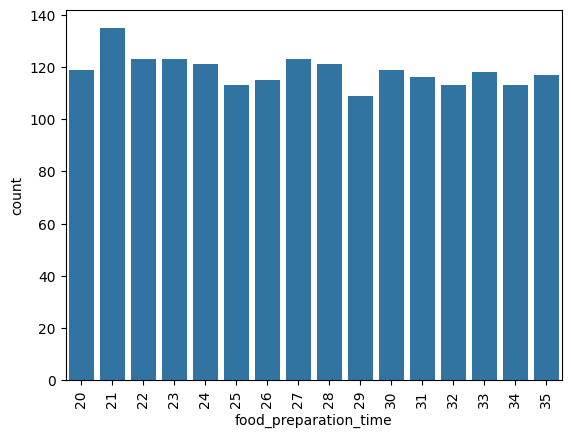



<function violinplot at 0x7d7ec3fb6160>


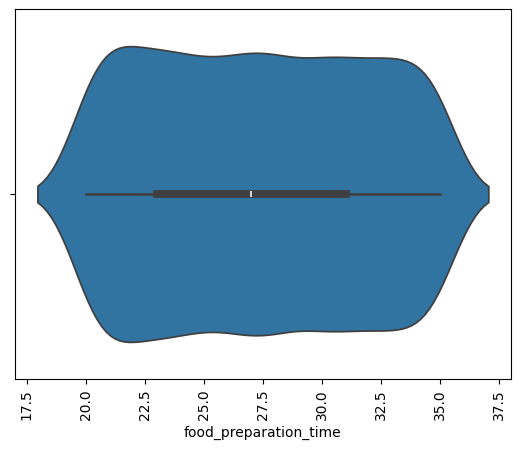





Column name: delivery_time
Total unique values in the column: 19


<function histplot at 0x7d7ec405c540>
Unique values in the column: 
[20 23 28 15 24 21 30 26 22 17 25 16 29 27 18 31 32 19 33]




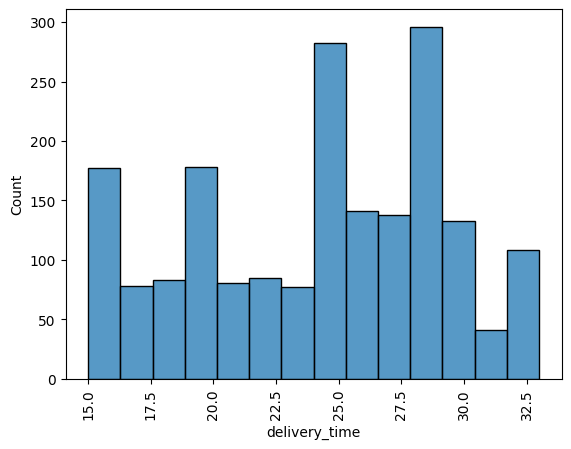



<function boxplot at 0x7d7ec3fb60c0>


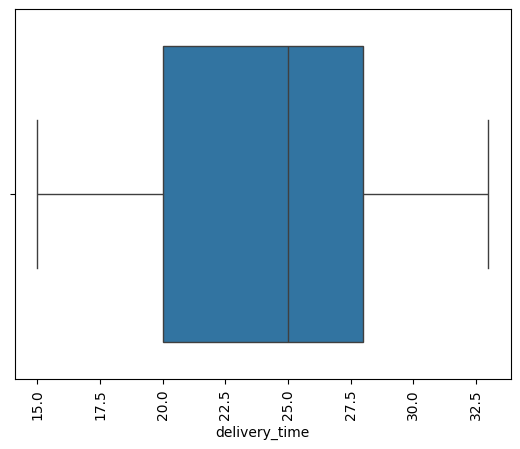



<function countplot at 0x7d7ec3fb6520>


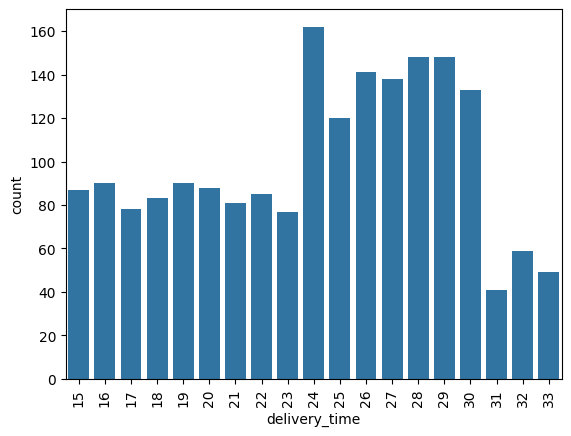



<function violinplot at 0x7d7ec3fb6160>


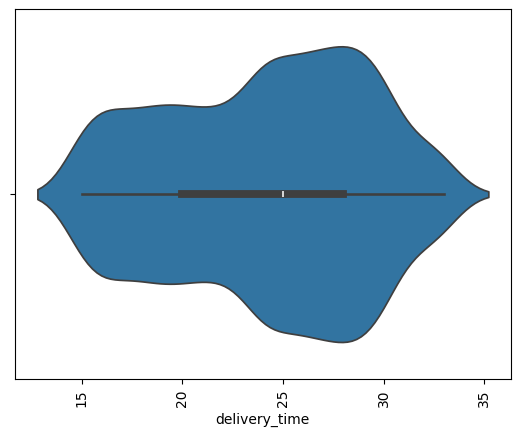

In [272]:
# Write the code here
# df.head(5)
total_rows = df.shape[0]
for column_name in df.columns:
    print("\n")
    print(f"Column name: {column_name}")
    print(f"Total unique values in the column: {df[column_name].nunique()}")
    if column_name in ['restaurant_name']:
        print("The column has too many unique values for a plot to make sense for univariate analysis ....")
        continue
    if df[column_name].nunique() >= 1000:
        print("The column has too many unique values for a plot to make sense for univariate analysis ....")
        continue
    print("\n")
    # print(df[column_name].value_counts())
    for plot_name in [sns.histplot, sns.boxplot, sns.countplot, sns.violinplot]:
        print(plot_name)
        # method_to_call = eval(sns.plot_name)
        if df[column_name].nunique() >= 20:
            if plot_name == sns.histplot:
                plot_name(data=df, x=column_name, bins='auto');
                plt.xticks(rotation=90)
                plt.show()
                print("\n")
            else:
                continue
        else:
            if plot_name == sns.histplot:
                print("Unique values in the column: ")
                print(df[column_name].unique())
                print("\n")
            plot_name(data=df, x=column_name);
            plt.xticks(rotation=90)
            plt.show()
            print("\n")


#### Observations:

These columns have too many unique values for plotting a graph:


*   order_id
*   customer_id
*   restaurant_name

Observations about other columns are included in the output of the code.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# restaurant_order_count = df['restaurant_name'].value_counts().to_frame()
restaurant_order_count = df['restaurant_name'].value_counts().rename_axis('restaurant_name').reset_index(name='count')
# print(type(restaurant_order_count))
# print(type(df))
# restaurant_order_count.head()
# restaurant_order_count = restaurant_order_count.sort_values(by=['count'], ascending=False)
# print(type(restaurant_order_count))
# print(restaurant_order_count)
# restaurant_order_count
# restaurant_order_count.head(5)
restaurant_order_count['restaurant_name'].head(5)

,restaurant_name
0,Shake Shack
1,The Meatball Shop
2,Blue Ribbon Sushi
3,Blue Ribbon Fried Chicken
4,Parm


#### Observations:
These are the restaurants which received the maximum number of orders:

1.   Shake Shack - 219 orders
2.   The Meatball Shop - 132 orders
3.   Blue Ribbon Sushi - 119 orders
4.   Blue Ribbon Fried Chicken - 96 orders
5.   Parm - 68 orders



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# df.head(5)
# df['cuisine_type'][df['day_of_the_week'] == 'Weekend'].value_counts().head(1).rename_axis('cuisine_type').reset_index(name='count')
df['cuisine_type'][df['day_of_the_week'] == 'Weekend'].value_counts().head(1).rename_axis('cuisine_type').reset_index(name='count')['cuisine_type']
# print(type(df['cuisine_type'][df['day_of_the_week'] == 'Weekend'].value_counts().head(1)))

,cuisine_type
0,American


#### Observations:
American cuisine type got ordered 415 times on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [172]:
# Write the code here
df.head(10)
# df.shape
count = df['cost_of_the_order'][df['cost_of_the_order'] > 20].count()
total_count = df.shape[0]
# print(count)
# print(type(count))
# total_count = df['cost_of_the_order'][df['cost_of_the_order'] > 0].count()
# print(count, total_count)
# print(count)
# print(df.shape[0])
percent_above_20 = round((count/total_count)*100, 2)
print(f"Percantage of orders above $20: {percent_above_20}%")

Percantage of orders above $20: 29.24%


#### Observations:
29.24% of the orders cost above 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [173]:
# Write the code here
result1 = df.describe()
# print(type(result1))
# print(df.describe().T)
result2 = result1['delivery_time']
# print(result1)
# print(result2)
# sns.boxplot(data=df, x='delivery_time');
print(f"Mean order delivery time: {round(result2['mean'], 2)} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:
Mean order delivery time: 24.1617 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [273]:
# Write the code here
# df.head()
print("These are the top 3 customers eligible for the 20% discount vouchers:")
df_discount = df['customer_id'].value_counts().head(3).rename_axis('customer_id').reset_index(name='count')
print("Rank: Customer ID -> Number of Orders")
i = 1
for index, row in df_discount.iterrows():
    print(f"   {i}:       {row['customer_id']} -> {row['count']} orders")
    i += 1



These are the top 3 customers eligible for the 20% discount vouchers:
Rank: Customer ID -> Number of Orders
   1:       52832 -> 13 orders
   2:       47440 -> 10 orders
   3:       83287 -> 9 orders


#### Observations:
These are the top 3 customers eligible for the 20% discount vouchers:

Rank: Customer ID -> Number of Orders

   1:       52832 -> 13 orders

   2:       47440 -> 10 orders
   
   3:       83287 -> 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


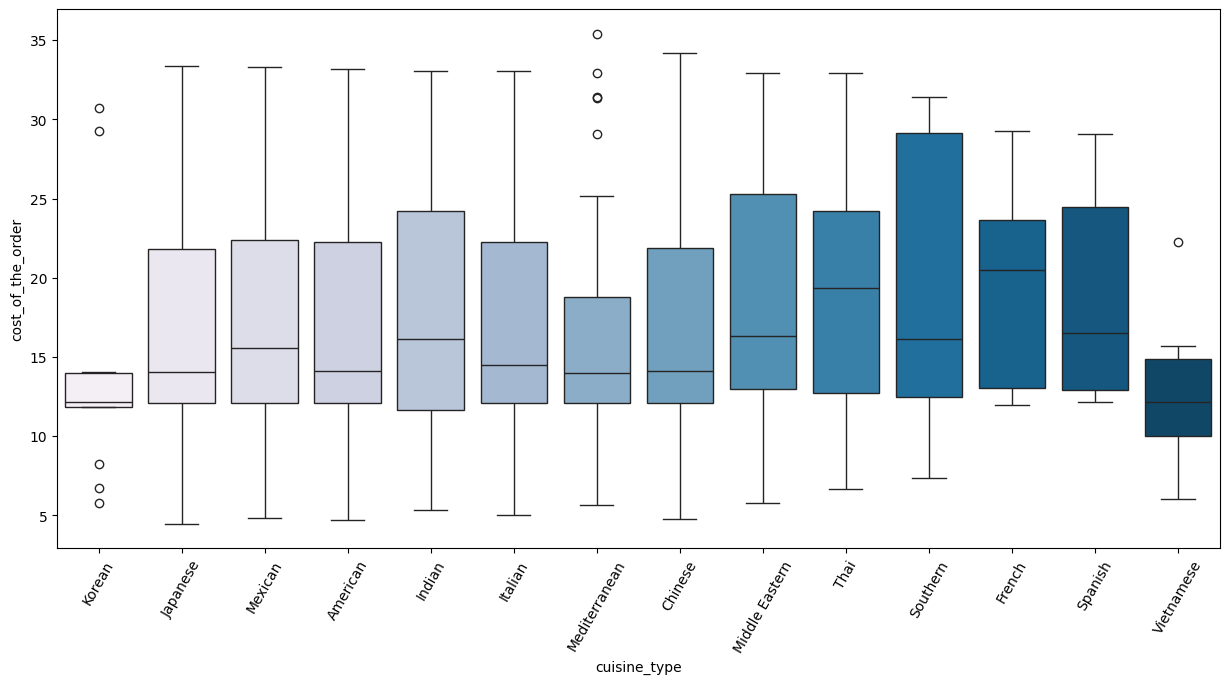

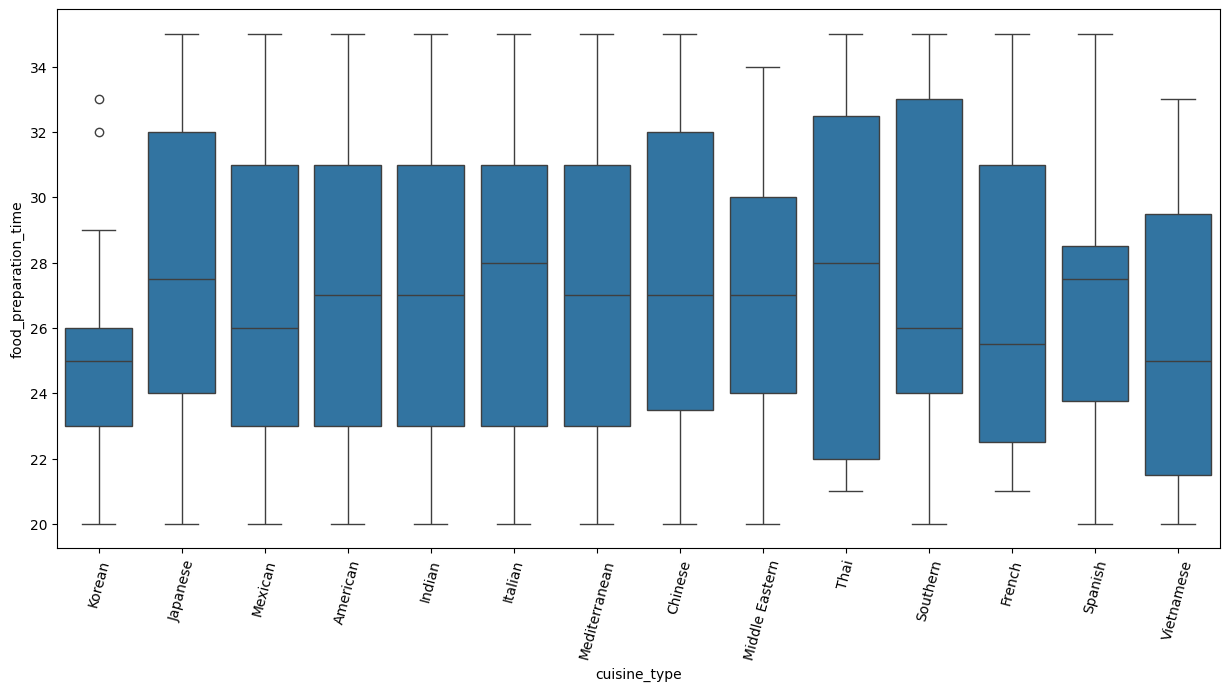

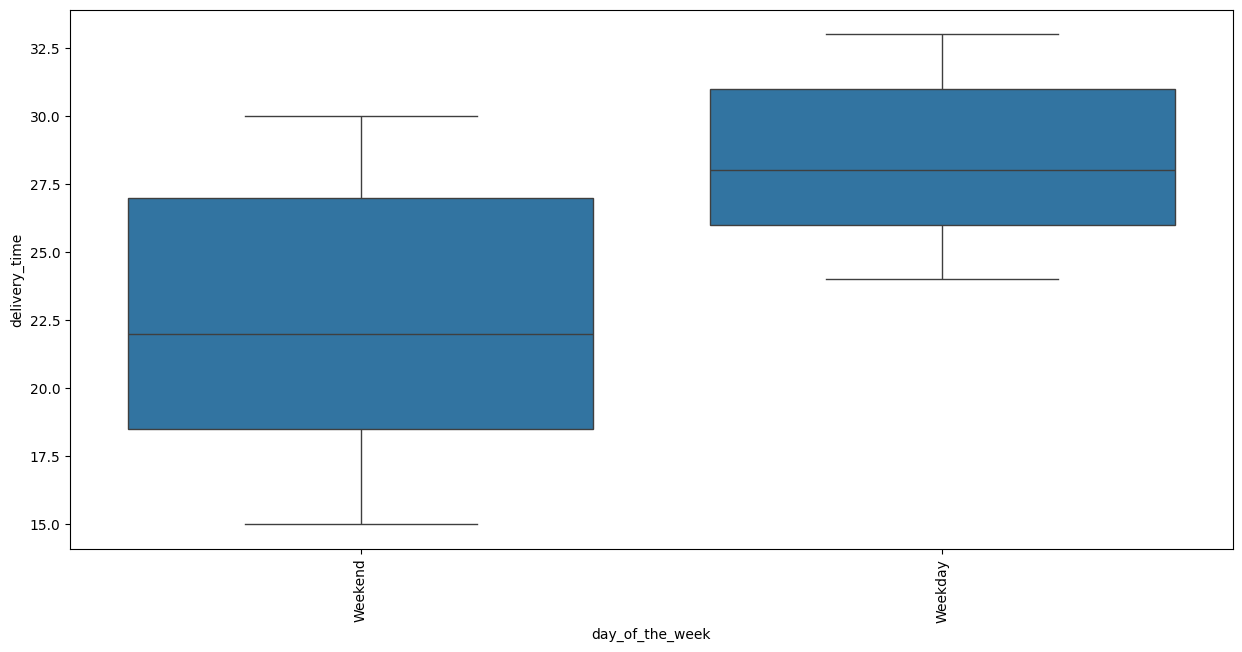



Total sale on weekday vs weekend:
Total sale in dollars on each of the weekday days: 1784.44
Total sale in dollars on each of the weekend days: 11196.3




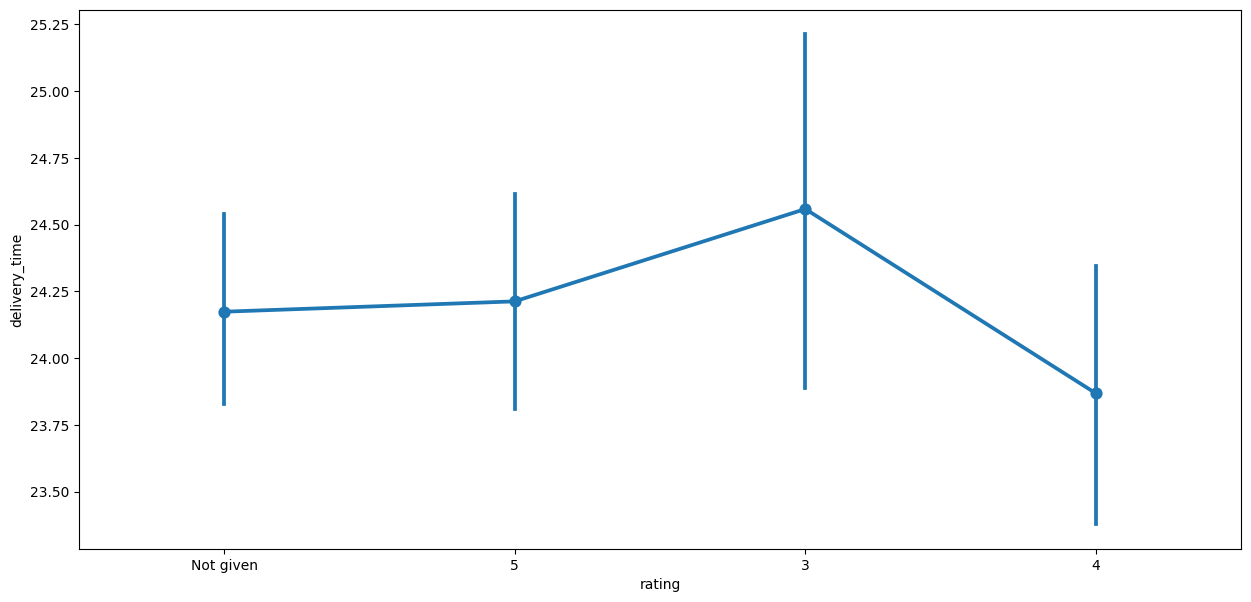

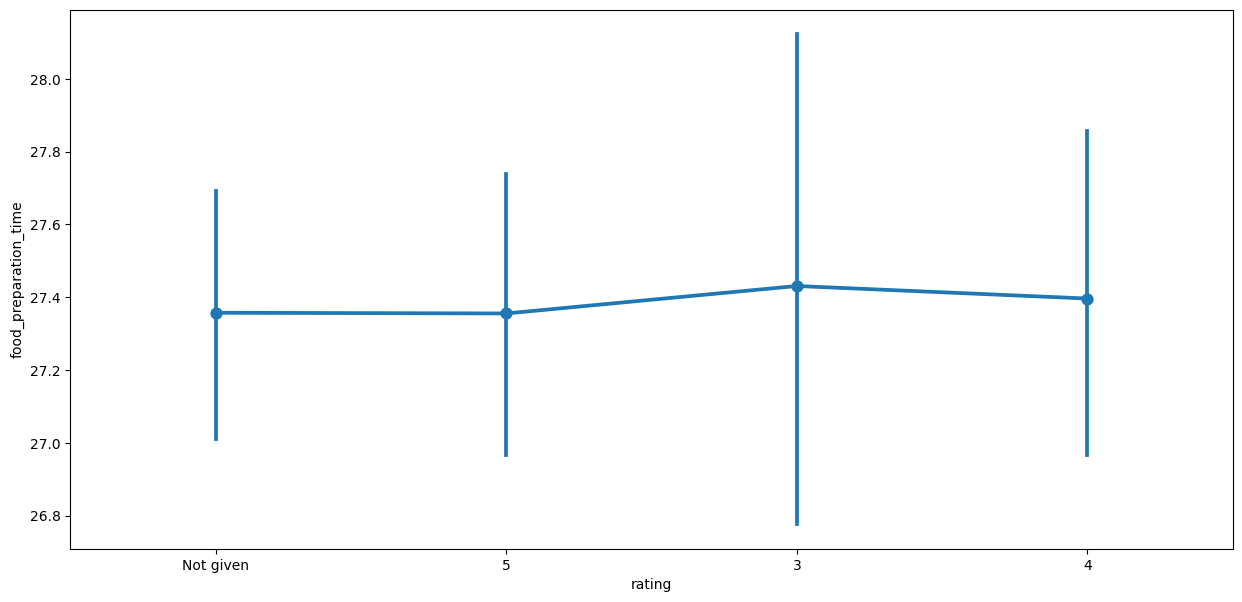

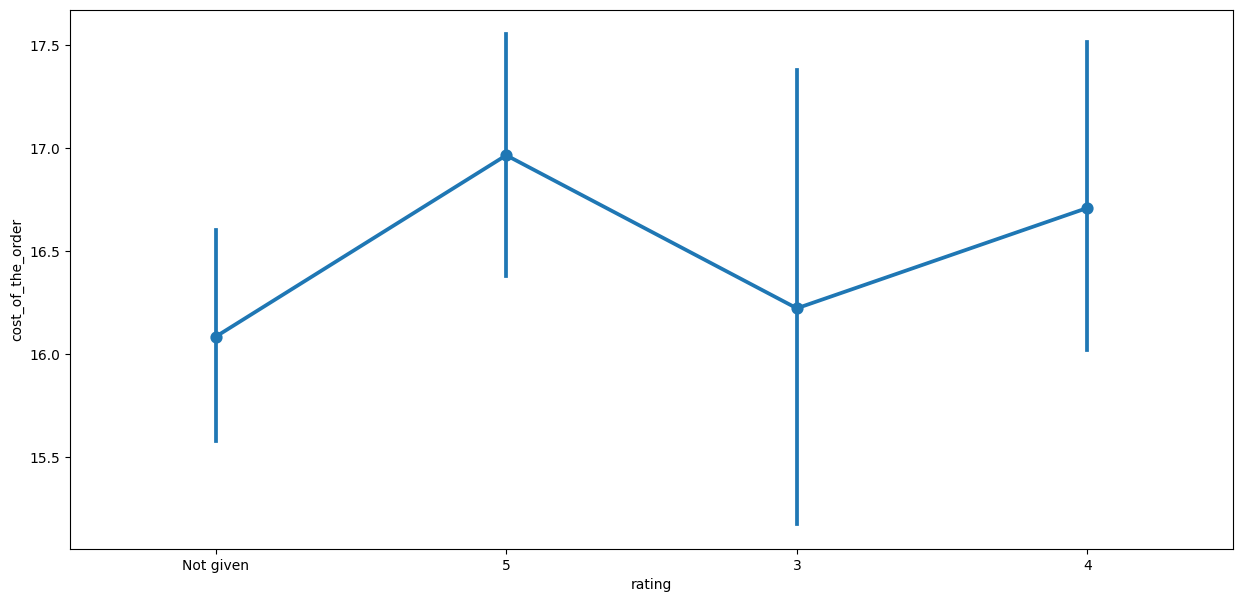

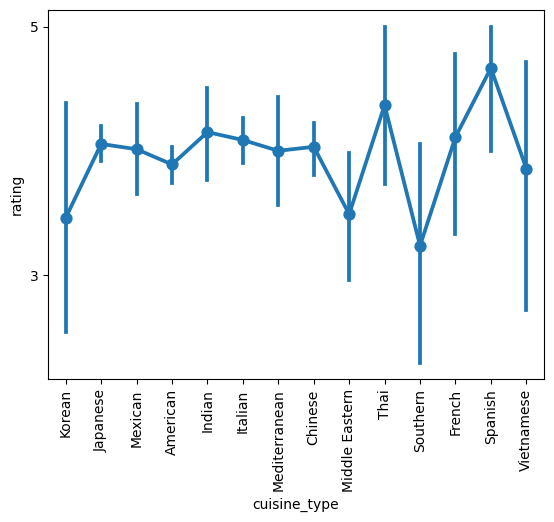

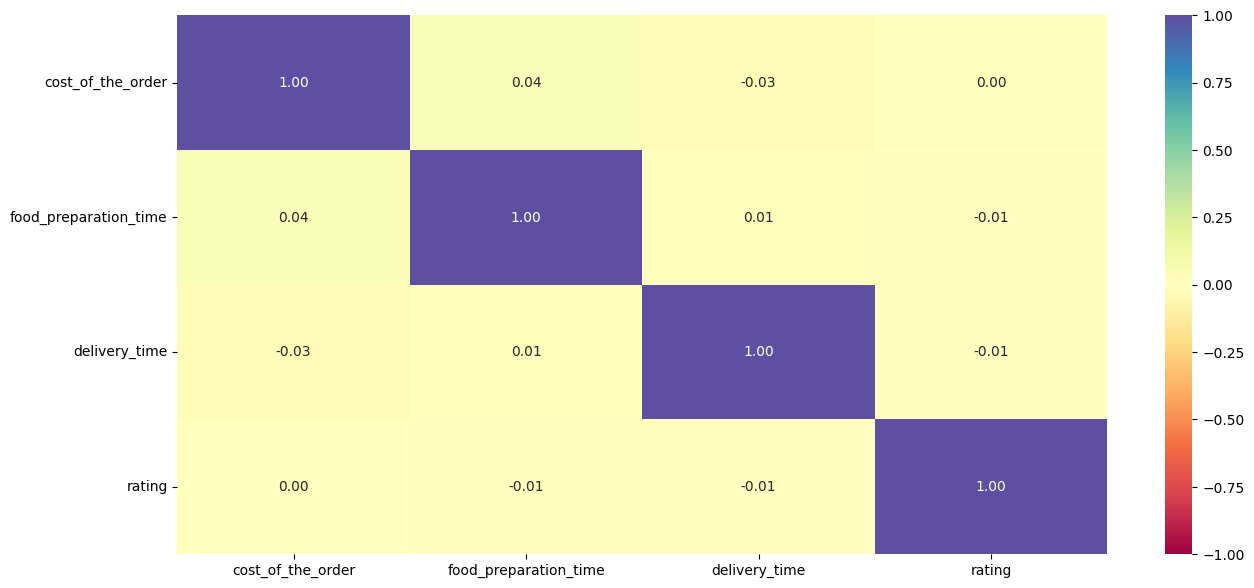

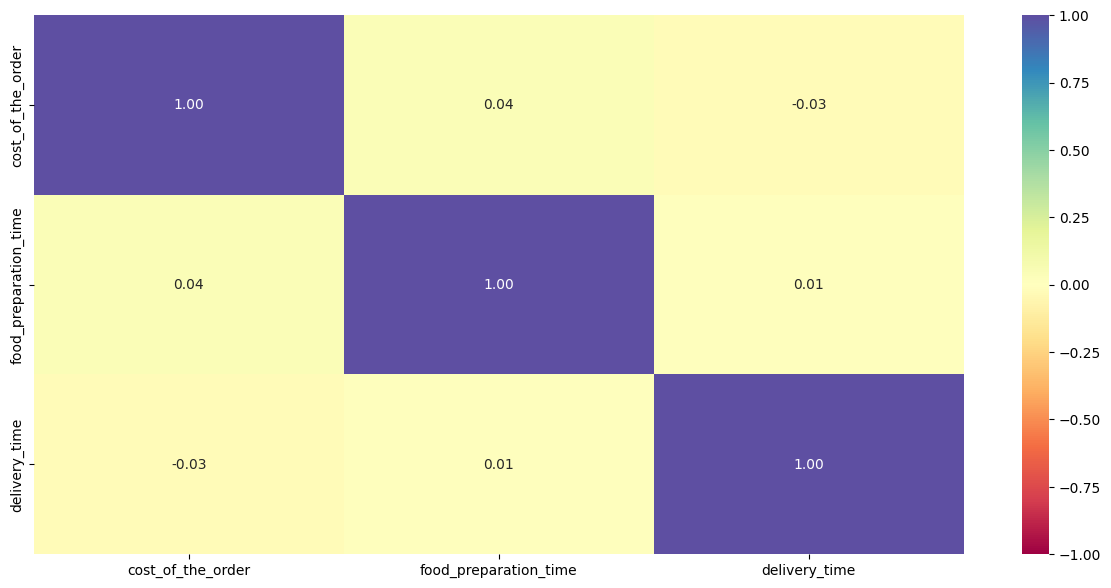



This gives us information on revenue generated by the restaurants in dollars:
restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda     

In [274]:
# Write the code here
# df.head()

# Cuisine type vs Cost of the order
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order", palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()
print("\n")

# Cuisine vs Food Preparation time
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y = 'food_preparation_time')
plt.xticks(rotation = 75)
plt.show()
print("\n")

# Day of the Week vs Delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.xticks(rotation = 90)
plt.show()
print("\n")

# Day of the Week vs total sale:
df_sales = df.copy()
print("Total sale on weekday vs weekend:")
df_sales_result = df_sales.groupby(['day_of_the_week'])['cost_of_the_order'].sum()
# print(df_sales_result)
print(f"Total sale in dollars on each of the weekday days: {round(df_sales_result['Weekday'] / 5, 2)}")
print(f"Total sale in dollars on each of the weekend days: {round(df_sales_result['Weekend'] / 2, 2)}")
print("\n")

# Rating vs Delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()
print("\n")

# Rating vs Food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = 'rating', y = 'food_preparation_time')
plt.show()
print("\n")

# Rating vs Cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = 'rating', y = 'cost_of_the_order')
plt.show()
print("\n")

# Correlation among variables using heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
df_heatmap = df.copy()
# print(df_heatmap['rating'].value_counts())
mode_value = df_heatmap['rating'][df_heatmap['rating'] != 'Not given'].mode()[0]
df_heatmap['rating'] = df_heatmap['rating'].replace(['Not given'], mode_value)
# print(df_heatmap.head(100))
sns.pointplot(data = df_heatmap, x = 'cuisine_type', y = 'rating')
plt.xticks(rotation = 90)
plt.show()
print("\n")
plt.figure(figsize=(15, 7))
sns.heatmap(df_heatmap[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()
print("\n")

col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()
print("\n")

# Revenue generated by the restaurants
print("This gives us information on revenue generated by the restaurants in dollars:")
print(df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20))

#### Observations:

* Korean and Vietnamese food are relatively cheaper.
* Southern and Middle Eastern food are relatively expensive.
* Thai and Italian food take longer to cook than most other cuisine types.
* Korean and Vietnamese food are relatively quicker to cook.
* It takes longer for food to get delivered on weekdays.
* Restaurants with longer delivery times have the worst ratings from customers, in general.
* Restaurants with longer food cooking times have the worst ratings from customers, in general.
* Restaurants with higher cost of the order have better ratings than those with lower cost, in general.
* Top 20 restaurants account for roughly two-thirds of all sales.
* Higher delivery times gets restaurants bad rating in general.
* Higher food preparation time generally increases the cost of the order.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [244]:
# Write the code here
# df.head()
# print(df['rating'].value_counts())
selected_columns = ['restaurant_name', 'rating']
condition = df['rating'] != 'Not given'
df_promo = df.loc[condition, selected_columns]
# df_promo.shape
df_promo['rating'] = df_promo['rating'].astype(float)
# print(df_promo.dtypes)
# df_promo.head()
df_promo_result = df_promo.groupby('restaurant_name').agg({'rating': ['count', 'mean']})
# df_promo.describe()
df_promo_result = df_promo_result[df_promo_result['rating']['count'] > 50]
df_promo_result = df_promo_result[df_promo_result['rating']['mean'] > 4]
# print(type(df_promo_result))
# df_promo_result.shape
# df_promo_result.describe()
# df_promo_result.info()
print("The restaurants eligible to get the promotional offer are:")
for restaurant in list(df_promo_result.index):
    print(restaurant)


The restaurants eligible to get the promotional offer are:
Blue Ribbon Fried Chicken
Blue Ribbon Sushi
Shake Shack
The Meatball Shop


#### Observations:

The restaurants eligible to get the promotional offer are:

* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Shake Shack
* The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [245]:
# Write the code here
# Function to calculate the revenue
def calc_rev(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return cost * 0

df_revenue = df.copy()
df_revenue['Revenue'] = df['cost_of_the_order'].apply(calc_rev)
total_revenue = df_revenue['Revenue'].sum()
# print(df['cost_of_the_order'].sum());
# print(df['cost_of_the_order'][df['cost_of_the_order'] > 20].sum())
# print(df['cost_of_the_order'][df['cost_of_the_order'] > 5].sum() - df['cost_of_the_order'][df['cost_of_the_order'] > 20].sum())
print('The net revenue generated by the company across all orders is:', round(total_revenue, 2), 'dollars')

The net revenue generated by the company across all orders is: 6166.3 dollars


#### Observations:
Overall, the company made around 19.69% of total sales in revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [191]:
# Write the code here
# df.head()

total_orders_above_60 = df['delivery_time'][((df['delivery_time'] + df['food_preparation_time']) > 60)].count()
total_orders = df['delivery_time'].count()

print(f"Total orders that took more than 60 minutes to get delivered: {total_orders_above_60}")
print(f"Total number of orders: {total_orders}")
percent_above_60 = round((total_orders_above_60/total_orders)*100, 2)
print(f"The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed : {percent_above_60} %")

Total orders that took more than 60 minutes to get delivered: 200
Total number of orders: 1898
The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed : 10.54 %


#### Observations:
Total orders that took more than 60 minutes to get delivered: 200

Total number of orders: 1898

The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed : 10.54 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Mean delivery time during weekdays: 28.34 minutes
Mean delivery time during weekends: 22.47 minutes




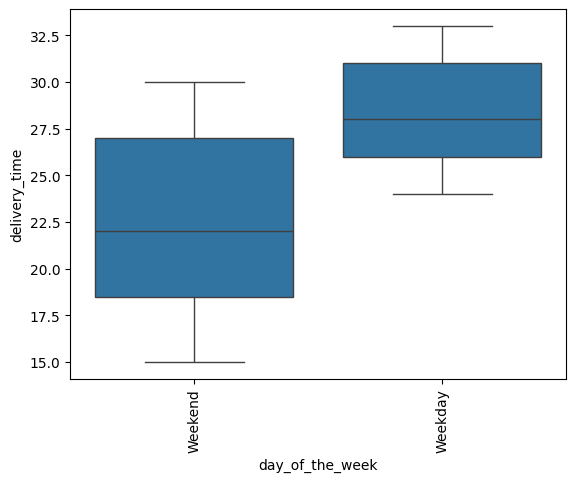

In [275]:
# Write the code here
df.head()

print(f"Mean delivery time during weekdays: {round(df['delivery_time'][df['day_of_the_week'] == 'Weekday'].mean(), 2)} minutes")
print(f"Mean delivery time during weekends: {round(df['delivery_time'][df['day_of_the_week'] == 'Weekend'].mean(), 2)} minutes")
print("\n")

sns.boxplot(data=df, x='day_of_the_week', y='delivery_time');
plt.xticks(rotation=90)
plt.show()

#### Observations:
On weekdays, it takes roughly 26% more time compared to weekends.
One of the reasons could be work commute related traffic on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Korean and Vietnamese food are relatively cheaper.
* Southern and Middle Eastern food are relatively expensive.
* Thai and Italian food take longer to cook than most other cuisine types.
* Korean and Vietnamese food are relatively quicker to cook.
* It takes longer for food to get delivered on weekdays.
* Restaurants with longer delivery times have the worst ratings from customers, in general.
* Restaurants with longer food cooking times have the worst ratings from customers, in general.
* Restaurants with higher cost of the order have better ratings than those with lower cost, in general.
* Top 20 restaurants account for roughly two-thirds of all sales.
* Higher delivery times gets restaurants bad rating in general.
* Higher food preparation time generally increases the cost of the order.
* Better ratings results in higher sales.
* Better ratings generate higher revenue for the company.

### Recommendations:

*  Some of the restaurants should try to train their staff better to improve the cooking time. That should help in higher customer satisfaction and sales and possibly slightly lower cost of order.
* Some of the restaurants should try to improve the delivery personnel handover so that customers could receive their ordered food quicker. This should help in improving the rating of those restaurants.
* Restaurants should try to hire extra staff for weekends so that they could maximize their sales on weekends as the total sale per day of the weekend is more than 6 times of the total sale per day of a normal weekday. This would get them better ratings as delivery time would be lower for weekend orders.
* Some of the restaurants could try to bring down the cost of their food in order to increase the number of orders sold, thereby still improving overall sales.
* The company could try to onboard more Thai, Spanish, French and Indian restaurants to their sales platform by giving them some promotional offers, as they have better reviews. As a result, with higher sales in those cuisine types, the company would generate higher revenue.


---